In [1]:

import os

from pathlib import Path
import sys

# path_root = Path(__file__).parents[1]
# sys.path.append(str(path_root))
%cd ..

from tqdm.notebook import tqdm
import torch_sensor_lib as tsl
from torch.utils.data import DataLoader

import numpy as np
from os.path import join as jn
import yaml
import torch

import traceback
import logging

import matplotlib.pyplot as plt


/home/amir/projects/frame_stack


In [2]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
with open('pathes.yaml') as conf_file:
    path_config = yaml.safe_load(conf_file)

seed = np.random.seed(config['random_seed'])
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# %%
sim = tsl.FiberSimulator(config, device=device)

# %%
pic_path = path_config['p_video_path']
train_signal_path = path_config['train_s_video_path']
test_signal_path = path_config['test_s_video_path']


In [3]:
# params
indices = [150, 155, 160, 200]
throws = {"0", "1", "2", "3", "4", "5"}


In [5]:

total = 0
for path, folders, files in os.walk(pic_path):
    total += 1
    
for path, folders, files in tqdm(os.walk(pic_path), total=total):

    for file_name in files:
        if file_name[:-4] == 'prepared' and path[path.rfind('/')+1:] in throws:
            try:
                pic = np.load(jn(path, file_name))
                if file_name.endswith('.npz'):
                    pic = pic['arr_0']
                pic = pic.astype(np.float32)
            except Exception as e:
                print("Can't load file " + jn(path, file_name))
                logging.error(traceback.format_exc())
            dataloader = DataLoader(pic, batch_size=config['sim']['batch_size'])
            signals = []
            for batch in dataloader:
                signal = sim.fiber_real_sim(batch.to(device)).cpu().numpy()
                signals.append(signal)
            signals = np.concatenate(signals)
            # print(f"working in {path}")
            fig = plt.figure(figsize=(3*2, 3*len(indices)))
            plt.suptitle(path)
            for i, ind in enumerate(indices): 
                plt.subplot(len(indices), 2, 2*i+1)
                plt.title(str(ind))
                plt.imshow(pic[ind])
                
                plt.subplot(len(indices), 2, 2*i+2)
                plt.plot(np.swapaxes(signals[ind], 0, 1))
                plt.ylim((0, 1))
            plt.savefig(jn(path, '..', path[path.rfind('/')+1:]+'vis.jpg'))
            plt.close()
            # plt.show()
    # if len(files): break


/tmp/ipykernel_36554/2060522775.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path, folders, files in tqdm(os.walk(pic_path), total=total):


  0%|          | 0/13131 [00:00<?, ?it/s]

In [6]:
pressures = [
    np.load('data/video/pressure/544/11/prepared.npz')['arr_0'],
    np.load('data/video/pressure/544/12/prepared.npz')['arr_0'],
    np.load('data/video/pressure/1607/11/prepared.npz')['arr_0'],
]

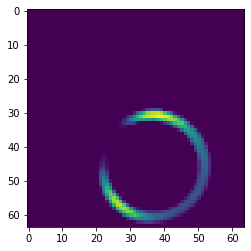

In [18]:
# pres = pressures[0]
pres = np.load('data/video/pressure/544/1/prepared.npz')['arr_0']
sum = pres[0]
for pic in pres[100::10]:
    sum += pic
    
plt.imshow(sum)
plt.show()


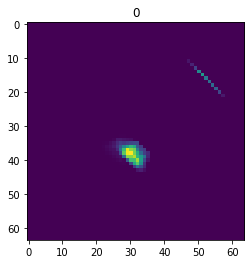

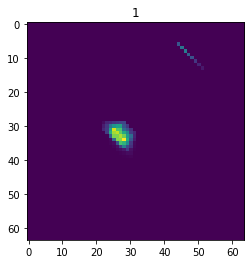

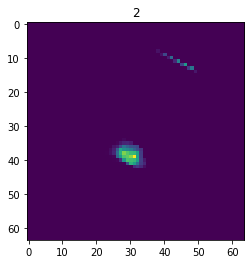

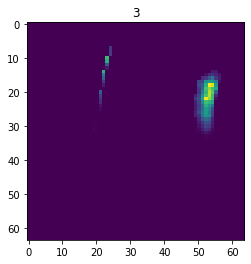

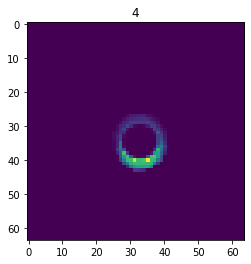

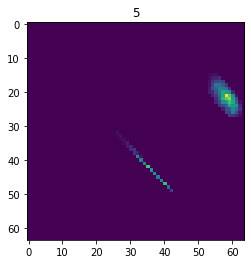

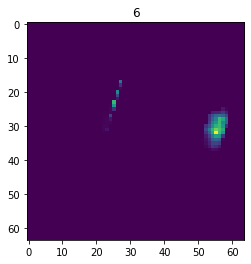

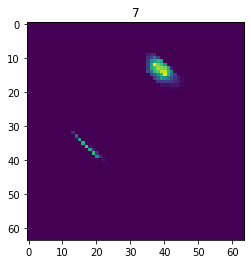

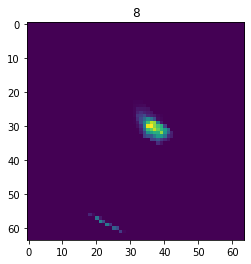

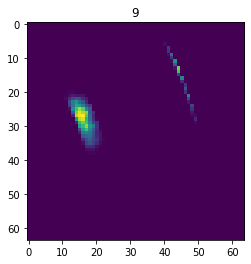

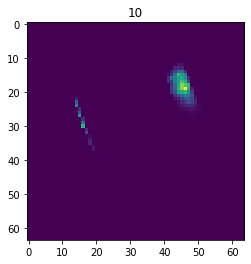

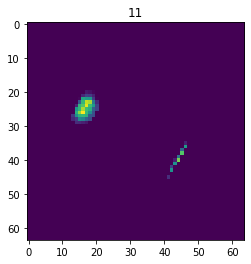

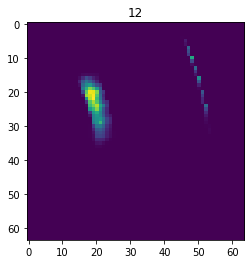

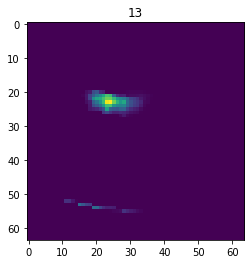

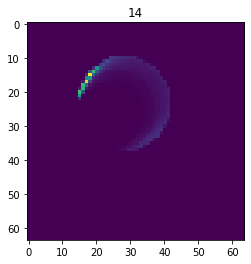

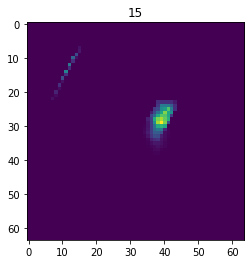

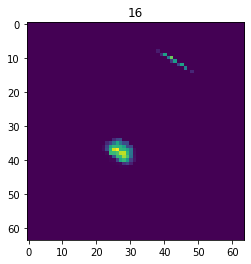

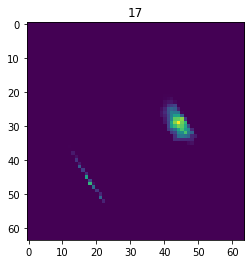

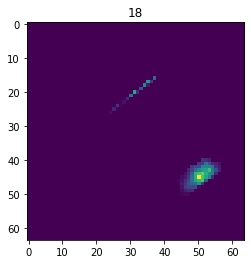

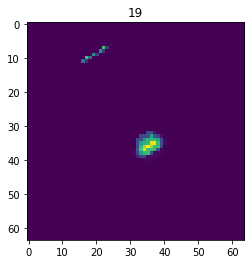

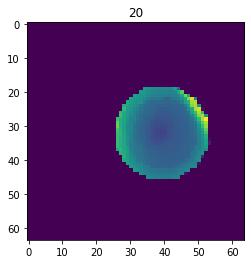

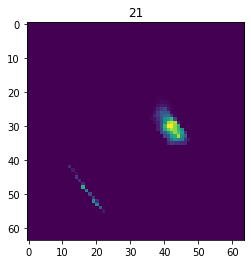

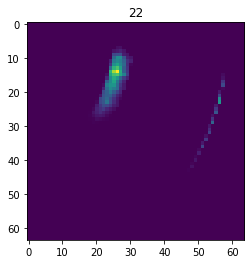

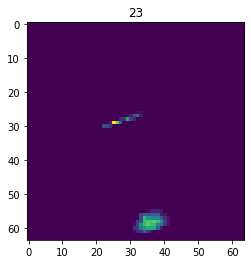

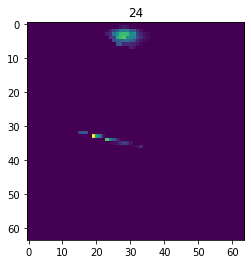

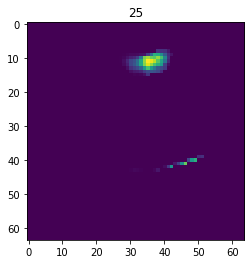

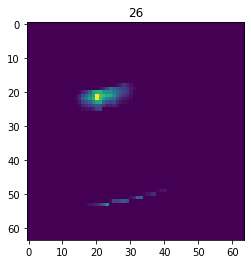

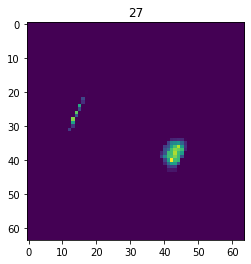

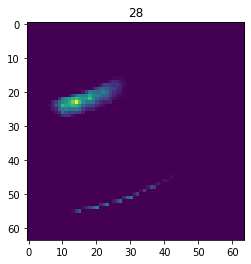

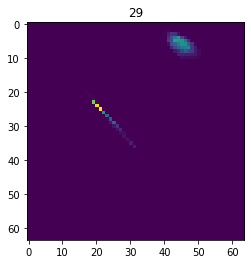

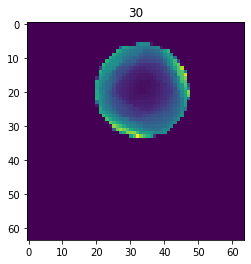

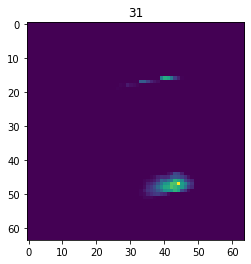

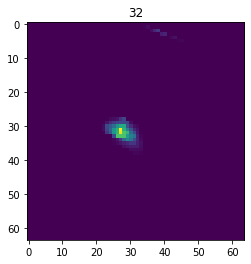

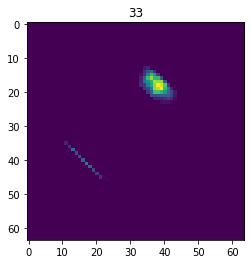

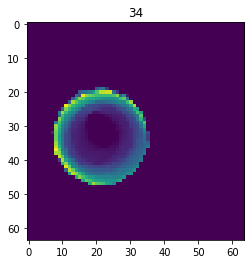

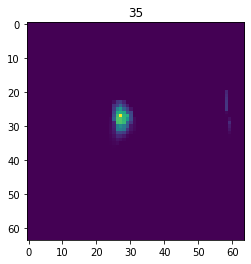

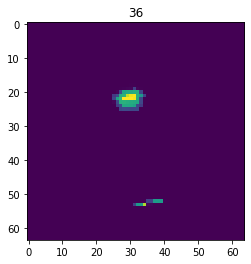

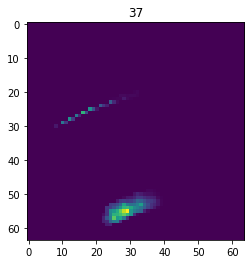

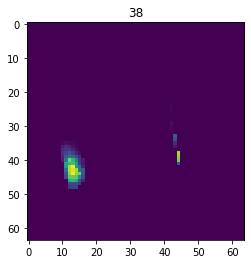

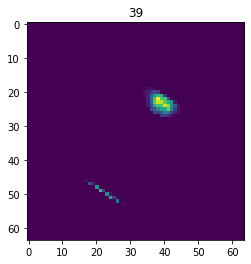

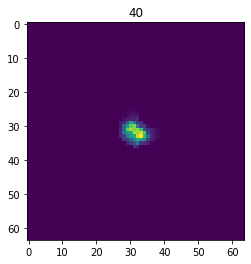

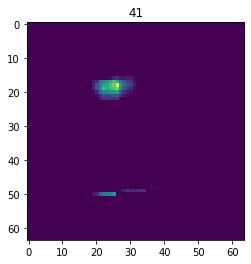

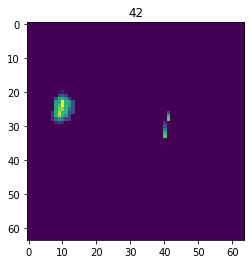

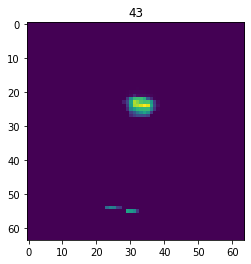

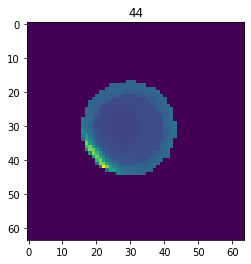

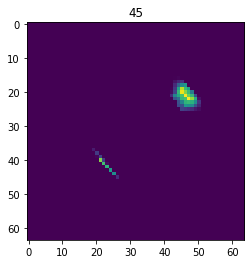

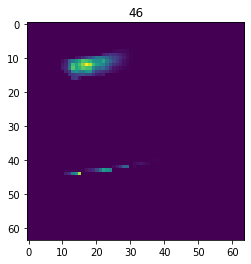

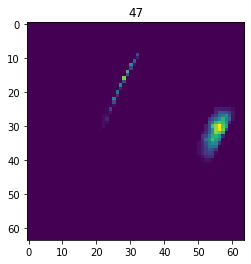

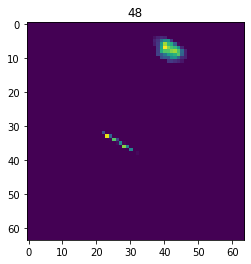

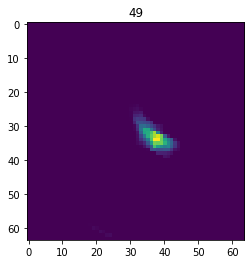

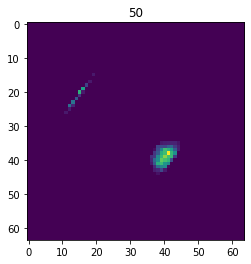

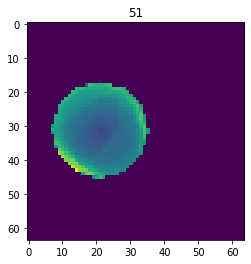

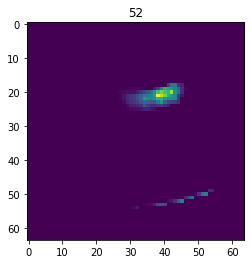

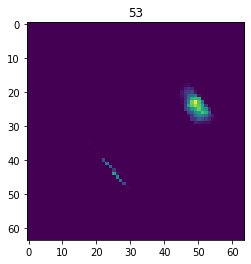

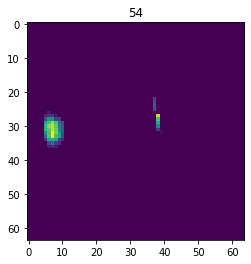

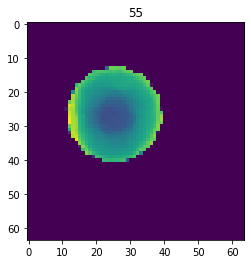

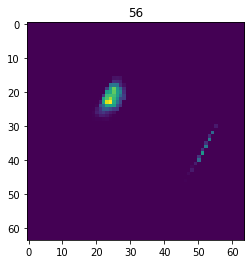

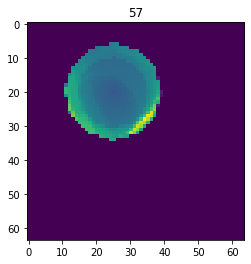

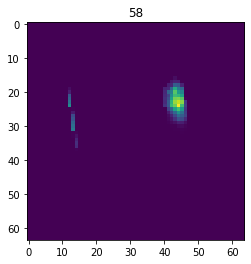

In [34]:
# pres = pressures[0]
for i in range(0, 59, 1):
    pres = np.load(f'data/video/pressure/s_1607/{i}/prepared.npz')['arr_0']
    sum = pres[0]
    for pic in pres[0::]:
        sum += pic
        
    plt.title(i)
    plt.imshow(sum)
    plt.show()


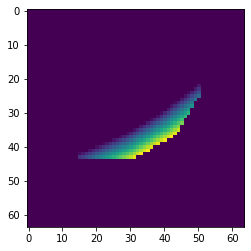

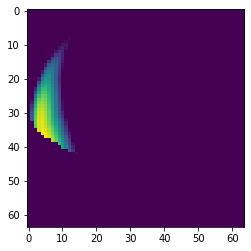

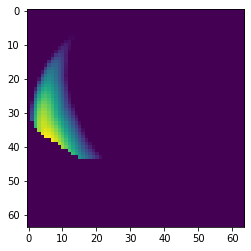

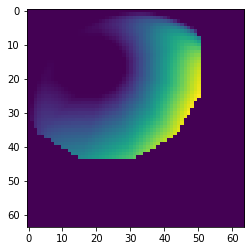

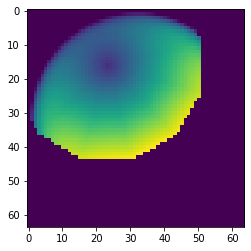

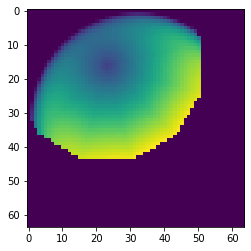

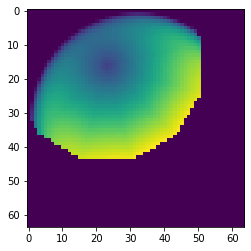

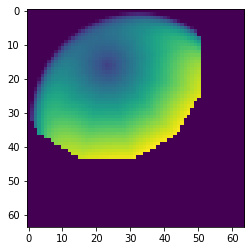

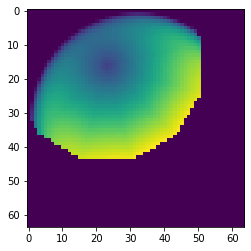

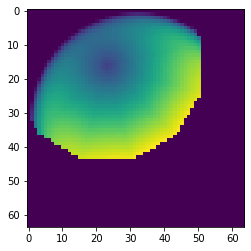

In [35]:

pres = np.load(f'data/video/pressure/1607/0/prepared.npz')['arr_0']
sum = pres[0]
for pic in pres[100::20]:
    plt.imshow(pic)
    plt.show()
